In [1]:
import os
# Display current working directory
print(os.getcwd())
# To make sure opencv imports .exr files
os.environ["OPENCV_IO_ENABLE_OPENEXR"] = "1"

c:\Dev\MinorProject\WDSS\jupyter_notebooks


In [2]:
# Set working directory to one level up
os.chdir('..')

# Imports

In [3]:
import cv2
from config import device, Settings
from utils.image_utils import ImageUtils

In [4]:
# Dataset directory
dataset_path = Settings.dataset_path

rendered_img_path = os.path.join(dataset_path, 'Data\\Supermarket_Map')
base_color_path = os.path.join(dataset_path, 'Data\\Supermarket_MapBaseColor')
motion_vector_path = os.path.join(dataset_path, 'Data\\Supermarket_MapMotionVector')
world_normal_path = os.path.join(dataset_path, 'Data\\Supermarket_MapWorldNormal')
depth_path = os.path.join(dataset_path, 'Data\\Supermarket_MapSceneDepth')

grouped_paths = [(rendered_img_path, 'rendered_img'), (base_color_path, 'base_color'), (motion_vector_path, 'motion_vector'), (world_normal_path, 'world_normal'), (depth_path, 'depth')]

total_images = range(0, 121)

def get_full_path(path: str, iamge_number: int) -> str:
    # Convert image number to 4 digit string
    image_number_str = f'{iamge_number:04}'
    path += f'.{image_number_str}.exr'
    return path

get_full_path(rendered_img_path, 0)

'D:\\Download\\Datasets\\DATA_Prashant\\Data\\Supermarket_Map.0000.exr'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9072266..3.140625].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.12646484..1.2783203].


rendered_img: (720, 1280, 3)
base_color: (576, 1024, 3)
motion_vector: (576, 1024, 3)
world_normal: (576, 1024, 3)
depth: (576, 1024, 3)


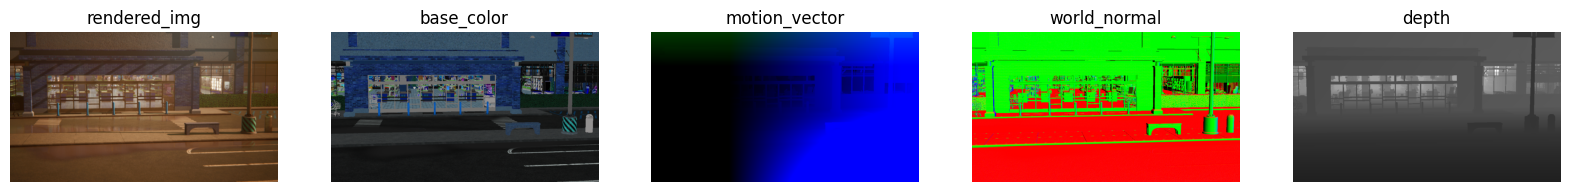

In [5]:
image_no = 52
paths, names = zip(*grouped_paths)
paths = [get_full_path(path, image_no) for path in paths]
images = [ImageUtils.load_exr_image_opencv(path) for path in paths]

images_copy = [image.copy() for image in images]

# Display images
for image, name in zip(images, names):
    print(f'{name}: {image.shape}')

ImageUtils.display_images(images_copy, names)

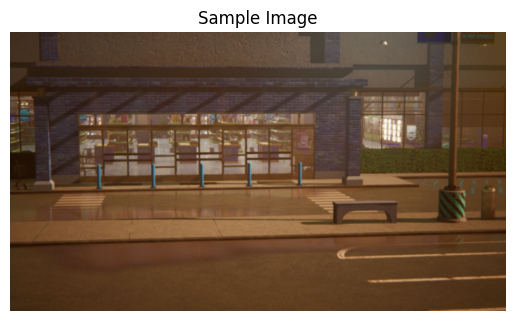

In [6]:
sample_image = images[0]
upsampled = ImageUtils.upsample(ImageUtils.opencv_image_to_tensor(sample_image), 2, "bicubic")
ImageUtils.display_image(upsampled, 'Sample Image')